# **Análisis exploratorio de los datos**
#integrantes
Ana María Montañez Becerra   c.c 1152224184

Joanny Torres Cardona        c.c 1152218692

Se carga nuevamente el dataset

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anamariamontanez99","key":"c6906345c84b7c9375444e40db2c3d8f"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d skywescar/lifesnaps-fitbit-dataset

 98% 529M/540M [00:05<00:00, 94.7MB/s]
100% 540M/540M [00:05<00:00, 101MB/s] 


In [ ]:
!unzip '/content/lifesnaps-fitbit-dataset.zip'

Archive:  /content/lifesnaps-fitbit-dataset.zip
  inflating: rais_anonymized/csv_rais_anonymized/daily_fitbit_sema_df_unprocessed.csv  
  inflating: rais_anonymized/csv_rais_anonymized/hourly_fitbit_sema_df_unprocessed.csv  
  inflating: rais_anonymized/mongo_rais_anonymized/fitbit.bson  
  inflating: rais_anonymized/mongo_rais_anonymized/fitbit.metadata.json  
  inflating: rais_anonymized/mongo_rais_anonymized/sema.bson  
  inflating: rais_anonymized/mongo_rais_anonymized/sema.metadata.json  
  inflating: rais_anonymized/mongo_rais_anonymized/surveys.bson  
  inflating: rais_anonymized/mongo_rais_anonymized/surveys.metadata.json  
  inflating: rais_anonymized/scored_surveys/breq.csv  
  inflating: rais_anonymized/scored_surveys/panas.csv  
  inflating: rais_anonymized/scored_surveys/personality.csv  
  inflating: rais_anonymized/scored_surveys/stai.csv  
  inflating: rais_anonymized/scored_surveys/ttm.csv  


In [ ]:
import pandas as pd #importación de pandas para mostrar los datos en un dataframe
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from progressbar import progressbar as pbar
%matplotlib inline
d= pd.read_csv (r'/content/rais_anonymized/csv_rais_anonymized/daily_fitbit_sema_df_unprocessed.csv')
d.head() #El dataset tiene 7410 columnas y 63 columnas por lo tanto cumple con los requisitos 

,Unnamed: 0,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,...,TENSE/ANXIOUS,TIRED,ENTERTAINMENT,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL
0,0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Las variables de mayor interés obtenidas con el reloj son: spo2 (porcentaje de saturación de oxigeno), bpm (latidos por minuto), rmssd (cuadrado de la raíz media de la unión de los intervalos R-R adyacentes) y nremhr (Latidos cardiacos durante sueño REM), las cuales dan información directa de la salud del usuario, y variables como nivel de estés y ritmo respiratorio al dormir.

Text(0, 0.5, 'Frecuencia')

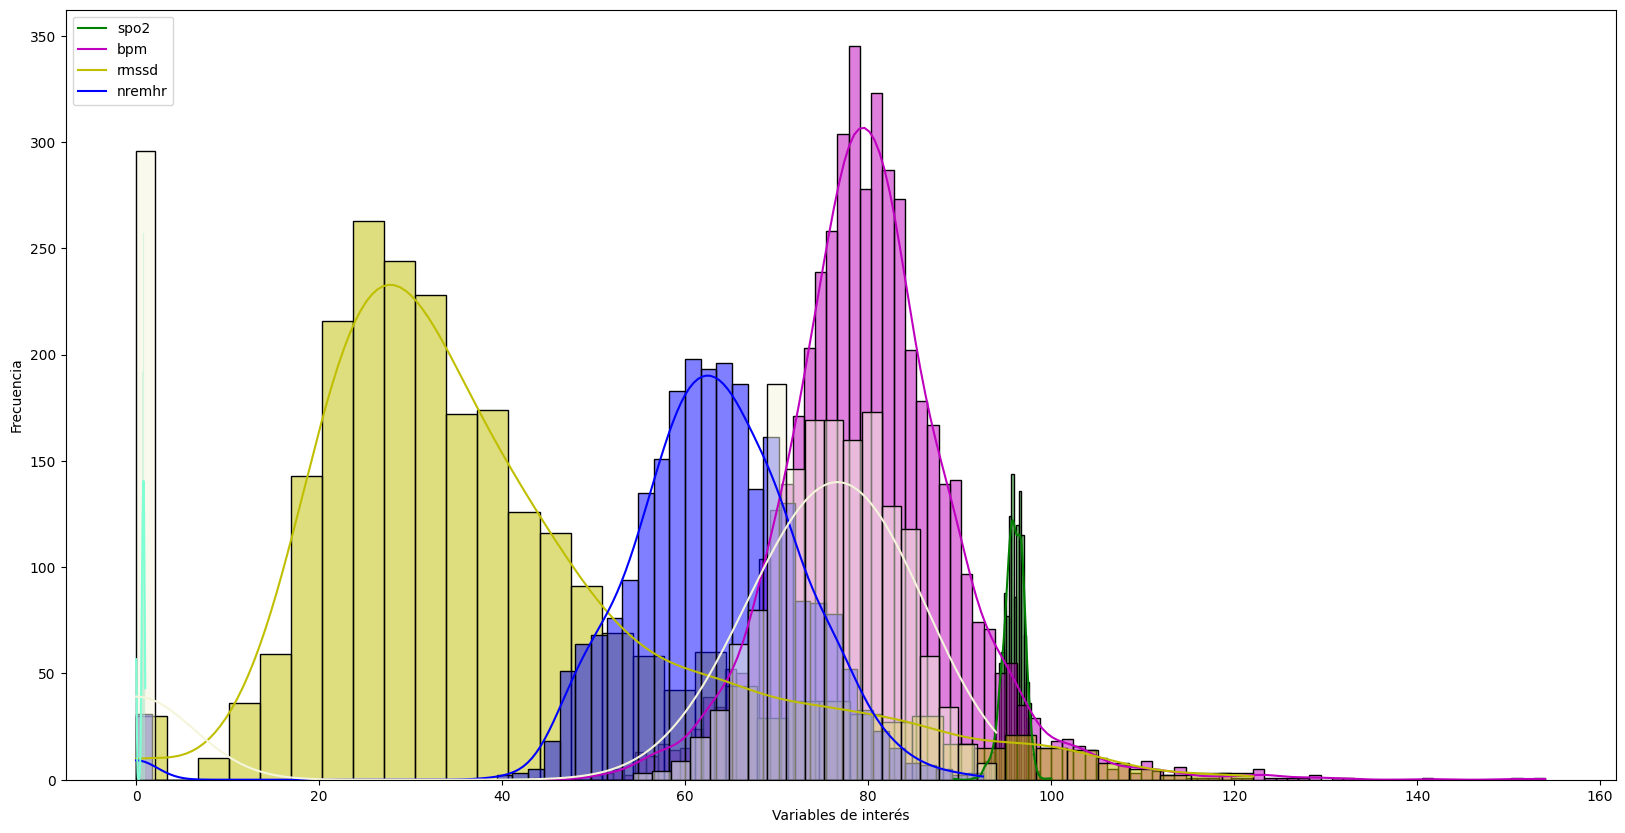

In [ ]:
''' Inspección de algunas variables '''
plt.figure(figsize=(20,10))
sns.histplot(d['spo2'], label='spo2', color='g',kde=True) #Saturación de oxigeno
sns.histplot(d['bpm'],label='bpm', color='m',kde=True)
sns.histplot(d['rmssd'], label='rmssd', color='y',kde=True)
sns.histplot(d['nremhr'], label='nremhr',color='b',kde=True)

sns.histplot(d['sleep_points_percentage'], label='sleep_points_percentage', color='#7FFFD4',kde=True)
sns.histplot(d['stress_score'], label='stress_score',color='#F5F5DC',kde=True)
plt.legend(('spo2','bpm','rmssd','nremhr'), loc = 'upper left')
plt.xlabel('Variables de interés')
plt.ylabel('Frecuencia')

In [ ]:
''' Cantidad de valores faltantes para cada columna  '''
k=d.isna().sum()
k[k!=0]

nightly_temperature                 4051
nremhr                              4935
rmssd                               4935
spo2                                6140
full_sleep_breathing_rate           4915
stress_score                        5534
sleep_points_percentage             5534
exertion_points_percentage          5534
responsiveness_points_percentage    5534
daily_temperature_variation         4106
badgeType                           6895
calories                             750
filteredDemographicVO2Max           2617
distance                            2633
activityType                        5197
bpm                                 2606
lightly_active_minutes               327
moderately_active_minutes            327
very_active_minutes                  327
sedentary_minutes                    327
mindfulness_session                  299
scl_avg                             7030
resting_hr                          2988
sleep_duration                      3859
minutesToFallAsl

In [ ]:
d.columns

Index(['Unnamed: 0', 'id', 'date', 'nightly_temperature', 'nremhr', 'rmssd',
       'spo2', 'full_sleep_breathing_rate', 'stress_score',
       'sleep_points_percentage', 'exertion_points_percentage',
       'responsiveness_points_percentage', 'daily_temperature_variation',
       'badgeType', 'calories', 'filteredDemographicVO2Max', 'distance',
       'activityType', 'bpm', 'lightly_active_minutes',
       'moderately_active_minutes', 'very_active_minutes', 'sedentary_minutes',
       'mindfulness_session', 'scl_avg', 'resting_hr', 'sleep_duration',
       'minutesToFallAsleep', 'minutesAsleep', 'minutesAwake',
       'minutesAfterWakeup', 'sleep_efficiency', 'sleep_deep_ratio',
       'sleep_wake_ratio', 'sleep_light_ratio', 'sleep_rem_ratio', 'steps',
       'minutes_in_default_zone_1', 'minutes_below_default_zone_1',
       'minutes_in_default_zone_2', 'minutes_in_default_zone_3', 'age',
       'gender', 'bmi', 'step_goal', 'min_goal', 'max_goal', 'step_goal_label',
       'ALERT',

In [ ]:
newData=d.groupby('id').mean()
newData

,Unnamed: 0,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,...,TENSE/ANXIOUS,TIRED,ENTERTAINMENT,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL
id,,,,,,,,,,,,,,,,,,,,,
621e2e8e67b776a24055b564,35.000000,34.315168,56.571484,100.410210,NaN,15.270968,76.317460,0.795767,0.732540,0.771429,...,0.047619,0.261905,0.119048,0.000000,0.238095,0.0,0.000000,0.500000,0.000000,0.523810
621e2eaf67b776a2406b14ac,114.500000,34.252140,68.988272,25.992988,NaN,14.767500,74.731707,0.742683,0.777439,0.711789,...,0.416667,0.583333,0.083333,0.000000,0.750000,0.0,0.000000,0.416667,0.000000,0.666667
621e2ed667b776a24085d8d1,215.500000,33.998974,72.814016,26.519625,NaN,17.680000,NaN,NaN,NaN,NaN,...,0.285714,0.163265,0.102041,0.020408,0.755102,0.0,0.000000,0.163265,0.000000,0.428571
621e2ef567b776a24099f889,322.500000,31.975482,NaN,NaN,97.700000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621e2efa67b776a2409dd1c3,441.000000,34.167044,NaN,NaN,95.971212,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621e36c267b776a240ba2756,6956.500000,33.345793,NaN,NaN,NaN,NaN,61.818182,0.590152,0.657386,0.593939,...,0.000000,0.315789,0.157895,0.000000,0.631579,0.0,0.000000,0.052632,0.052632,0.105263
621e36dd67b776a240ce9a45,7067.000000,NaN,NaN,NaN,NaN,NaN,23.333333,0.188889,0.225000,0.288889,...,0.000000,0.041667,0.000000,0.000000,0.125000,0.0,0.000000,0.125000,0.291667,0.458333
621e36f967b776a240e5e7c9,7184.285714,33.988318,60.920045,70.315795,96.197619,14.715556,68.717391,0.714493,0.681522,0.667391,...,0.273810,0.476190,0.071429,0.000000,0.785714,0.0,0.095238,0.107143,0.357143,0.238095


In [ ]:
newData.columns

Index(['Unnamed: 0', 'nightly_temperature', 'nremhr', 'rmssd', 'spo2',
       'full_sleep_breathing_rate', 'stress_score', 'sleep_points_percentage',
       'exertion_points_percentage', 'responsiveness_points_percentage',
       'daily_temperature_variation', 'calories', 'filteredDemographicVO2Max',
       'distance', 'bpm', 'lightly_active_minutes',
       'moderately_active_minutes', 'very_active_minutes', 'sedentary_minutes',
       'scl_avg', 'resting_hr', 'sleep_duration', 'minutesToFallAsleep',
       'minutesAsleep', 'minutesAwake', 'minutesAfterWakeup',
       'sleep_efficiency', 'sleep_deep_ratio', 'sleep_wake_ratio',
       'sleep_light_ratio', 'sleep_rem_ratio', 'steps',
       'minutes_in_default_zone_1', 'minutes_below_default_zone_1',
       'minutes_in_default_zone_2', 'minutes_in_default_zone_3', 'min_goal',
       'max_goal', 'ALERT', 'HAPPY', 'NEUTRAL', 'RESTED/RELAXED', 'SAD',
       'TENSE/ANXIOUS', 'TIRED', 'ENTERTAINMENT', 'GYM', 'HOME', 'HOME_OFFICE',
       'OT

In [ ]:
print(newData['stress_score'])

id
621e2e8e67b776a24055b564    76.317460
621e2eaf67b776a2406b14ac    74.731707
621e2ed667b776a24085d8d1          NaN
621e2ef567b776a24099f889          NaN
621e2efa67b776a2409dd1c3          NaN
                              ...    
621e36c267b776a240ba2756    61.818182
621e36dd67b776a240ce9a45    23.333333
621e36f967b776a240e5e7c9    68.717391
621e375367b776a24021e950          NaN
621e375b67b776a240290cdc    72.909091
Name: stress_score, Length: 71, dtype: float64


In [ ]:
''' Cantidad de valores faltantes en cada columna  '''
k=newData.isna().sum()
k[k!=0]

nightly_temperature                  7
nremhr                              28
rmssd                               28
spo2                                43
full_sleep_breathing_rate           28
stress_score                        34
sleep_points_percentage             34
exertion_points_percentage          34
responsiveness_points_percentage    34
daily_temperature_variation         10
scl_avg                             69
sleep_duration                       2
minutesToFallAsleep                  2
minutesAsleep                        2
minutesAwake                         2
minutesAfterWakeup                   2
sleep_efficiency                     2
sleep_deep_ratio                    10
sleep_wake_ratio                    10
sleep_light_ratio                   10
sleep_rem_ratio                     10
min_goal                            10
max_goal                            10
ALERT                                8
HAPPY                                8
NEUTRAL                  

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [ ]:
from local.lib import mlutils

In [ ]:
def xdistplot(k, title="", xlim=None):
    vals = k
    sns.distplot(k, hist_kws={"alpha": .8});
    m,s = np.mean(vals), np.std(vals)
    plt.axvline(m, color="black", lw=2, alpha=.5)
    plt.axvline(m+s, color="red", lw=2, alpha=.5)
    plt.axvline(m-s, color="red", lw=2, alpha=.5)
    x = np.linspace(np.min(vals), np.max(vals), 100)
    plt.title(title)
    plt.grid();
    if xlim is not None:
        plt.xlim(xlim)

In [ ]:
def subs_policies(d, col):
    mcol = "%s_missing"%col
    dn = d.T.dropna().T
    dn = dn[[i for i in dn.columns if d[i].dtype!=object]]
    print (dn.shape)
    
    na_idxs = np.argwhere(d[col].isna().values)[:,0]

    dl0 = dn.copy()
    dlm = dn.copy()
    dlr = dn.copy()

    dl0[mcol] = d[col].fillna(0)
    dlm[mcol] = d[col].fillna( d[col].mean())

    k = d[col].copy()
    k[k.isna()] = np.random.normal(loc=np.mean(k), scale=np.std(k), size=np.sum(k.isna()))
    dlr[mcol] = k

    f0 = lambda: xdistplot(d[col].dropna(), "original", [0,150])
    f1 = lambda: xdistplot(dl0[mcol], "subs by zero", [0,150])
    f2 = lambda: xdistplot(dlm[mcol], "subs by mean", [0,150])
    f3 = lambda: xdistplot(dlr[mcol], "subs by equivalent normal", [0,150])

    mlutils.figures_grid(4,1, [f0, f1, f2, f3], figsize=(20,3))
    return dn, dl0, dlm, dlr, na_idxs

(71, 15)


<ipython-input-14-44e0e1649163>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k, hist_kws={"alpha": .8});
<ipython-input-14-44e0e1649163>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k, hist_kws={"alpha": .8});
<ipython-input-14-44e0e1649163>:3: UserWarning: 

`distplot` is a deprecated f

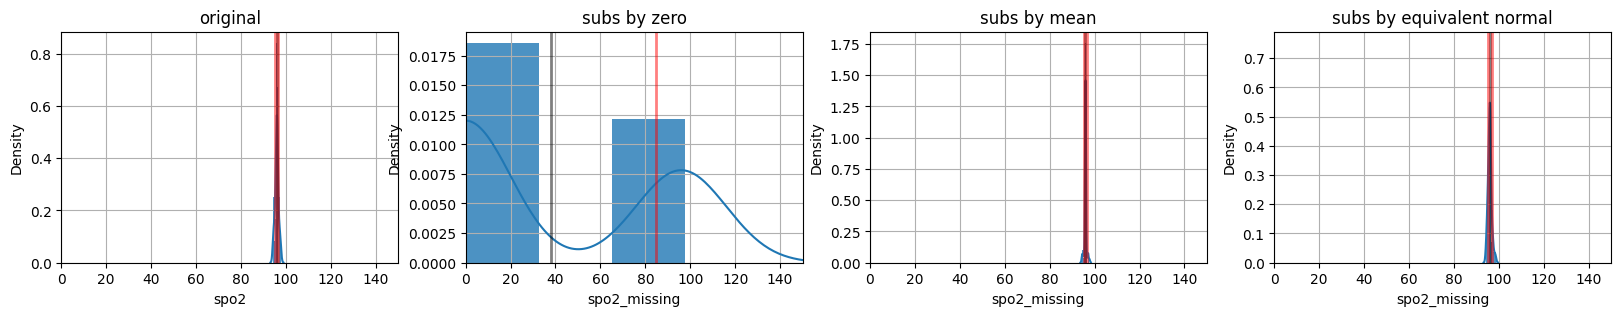

In [ ]:
## KEEPOUTPUT
dn, dl0, dlm, dlr, na_idxs = subs_policies(newData, "spo2")

(71, 15)


<ipython-input-14-44e0e1649163>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k, hist_kws={"alpha": .8});
<ipython-input-14-44e0e1649163>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k, hist_kws={"alpha": .8});
<ipython-input-14-44e0e1649163>:3: UserWarning: 

`distplot` is a deprecated f

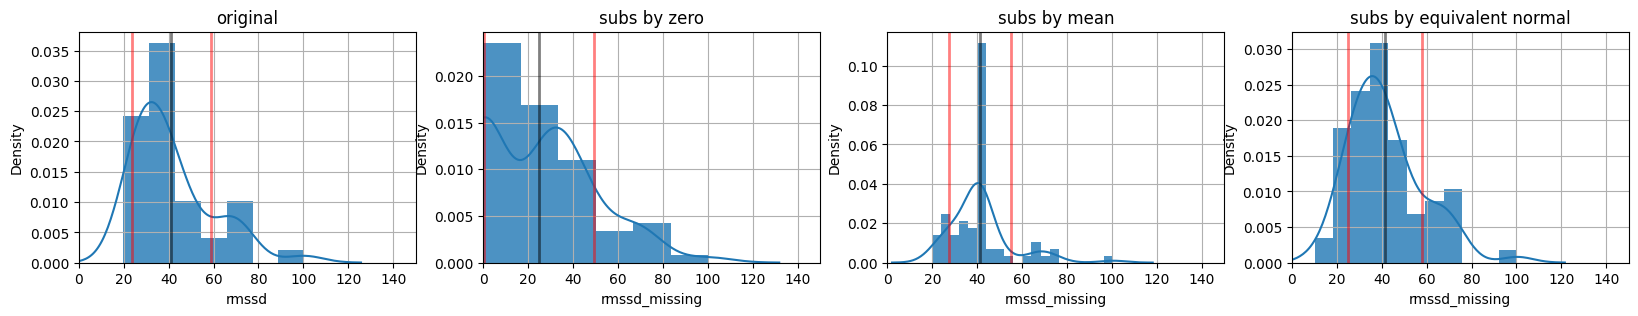

In [ ]:
dn, dl0, dlm, dlr, na_idxs = subs_policies(newData, "rmssd")

(71, 15)


<ipython-input-14-44e0e1649163>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k, hist_kws={"alpha": .8});
<ipython-input-14-44e0e1649163>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k, hist_kws={"alpha": .8});
<ipython-input-14-44e0e1649163>:3: UserWarning: 

`distplot` is a deprecated f

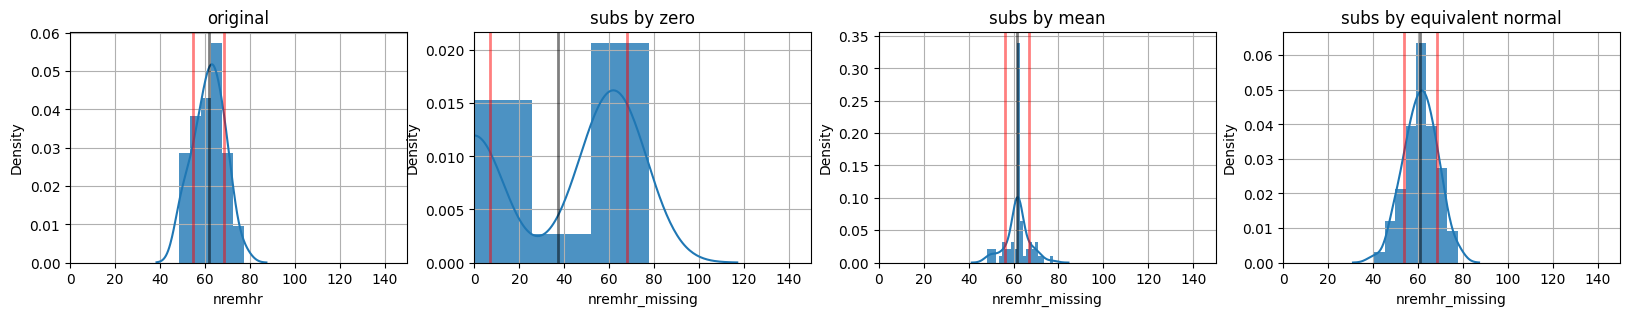

In [ ]:
dn, dl0, dlm, dlr, na_idxs = subs_policies(newData, "nremhr")